<a href="https://colab.research.google.com/github/fjadidi2001/Insurance/blob/main/NB_Claim_Prediction_FirstV_without_balance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Upload the dataset to Google Colab

In [1]:
from google.colab import files

# Upload the file
uploaded = files.upload()

Saving telematics_syn.csv to telematics_syn.csv


## Read the uploaded CSV file

In [2]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('telematics_syn.csv')

# Display the first few rows of the dataframe
df.head()

Duration  Insured.age Insured.sex  Car.age  Marital  Car.use  Credit.score  \
0       366           45        Male       -1  Married  Commute         609.0   
1       182           44      Female        3  Married  Commute         575.0   
2       184           48      Female        6  Married  Commute         847.0   
3       183           71        Male        6  Married  Private         842.0   
4       183           84        Male       10  Married  Private         856.0   

  Region  Annual.miles.drive  Years.noclaims  ...  Left.turn.intensity10  \
0  Urban             6213.71              25  ...                    1.0   
1  Urban            12427.42              20  ...                   58.0   
2  Urban            12427.42              14  ...                    0.0   
3  Urban             6213.71              43  ...                    0.0   
4  Urban             6213.71              65  ...                    2.0   

   Left.turn.intensity11  Left.turn.intensity12  Right.turn.intensity08  \
0                    0.0                    0.0                     3.0   
1                   24.0                   11.0                  1099.0   
2                    0.0                    0.0                     0.0   
3                    0.0                    0.0                     0.0   
4                    0.0                    0.0                   325.0   

   Right.turn.intensity09  Right.turn.intensity10  Right.turn.intensity11  \
0                     1.0                     0.0                     0.0   
1                   615.0                   219.0                   101.0   
2                     0.0                     0.0                     0.0   
3                     0.0                     0.0                     0.0   
4                   111.0                    18.0                     4.0   

   Right.turn.intensity12  NB_Claim    AMT_Claim  
0                     0.0         1  5100.171753  
1                    40.0         1   883.554840  
2                     0.0         0     0.000000  
3                     0.0         0     0.000000  
4                     2.0         0     0.000000  

[5 rows x 52 columns]

## Perform Basic Data Exploration

In [3]:
  print("Shape of the dataset:", df.shape)

Shape of the dataset: (100000, 52)


In [4]:
# Adjust display options to show all columns
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent line wrapping

# Display the first few rows of the dataframe
print(df.head())

   Duration  Insured.age Insured.sex  Car.age  Marital  Car.use  Credit.score Region  Annual.miles.drive  Years.noclaims  Territory  Annual.pct.driven  Total.miles.driven  Pct.drive.mon  Pct.drive.tue  Pct.drive.wed  Pct.drive.thr  Pct.drive.fri  Pct.drive.sat  Pct.drive.sun  Pct.drive.2hrs  Pct.drive.3hrs  Pct.drive.4hrs  Pct.drive.wkday  Pct.drive.wkend  Pct.drive.rush am  Pct.drive.rush pm  Avgdays.week  Accel.06miles  Accel.08miles  Accel.09miles  Accel.11miles  Accel.12miles  Accel.14miles  Brake.06miles  Brake.08miles  Brake.09miles  Brake.11miles  Brake.12miles  Brake.14miles  Left.turn.intensity08  Left.turn.intensity09  Left.turn.intensity10  Left.turn.intensity11  Left.turn.intensity12  Right.turn.intensity08  Right.turn.intensity09  Right.turn.intensity10  Right.turn.intensity11  Right.turn.intensity12  NB_Claim    AMT_Claim
0       366           45        Male       -1  Married  Commute         609.0  Urban             6213.71              25         70           0.849315  

## Get summary statistics

In [5]:
print("Summary statistics:\n", df.describe())

Summary statistics:
             Duration    Insured.age        Car.age   Credit.score  Annual.miles.drive  Years.noclaims      Territory  Annual.pct.driven  Total.miles.driven  Pct.drive.mon  Pct.drive.tue  Pct.drive.wed  Pct.drive.thr  Pct.drive.fri  Pct.drive.sat  Pct.drive.sun  Pct.drive.2hrs  Pct.drive.3hrs  Pct.drive.4hrs  Pct.drive.wkday  Pct.drive.wkend  Pct.drive.rush am  Pct.drive.rush pm   Avgdays.week  Accel.06miles  Accel.08miles  Accel.09miles  Accel.11miles  Accel.12miles  Accel.14miles  Brake.06miles  Brake.08miles  Brake.09miles  Brake.11miles  Brake.12miles  Brake.14miles  Left.turn.intensity08  Left.turn.intensity09  Left.turn.intensity10  Left.turn.intensity11  Left.turn.intensity12  Right.turn.intensity08  Right.turn.intensity09  Right.turn.intensity10  Right.turn.intensity11  Right.turn.intensity12      NB_Claim      AMT_Claim
count  100000.000000  100000.000000  100000.000000  100000.000000       100000.000000   100000.000000  100000.000000      100000.000000    

## Check for missing values

In [ ]:
print("Missing values:\n", df.isnull().sum())

# Visualize the dataset.

### missing values

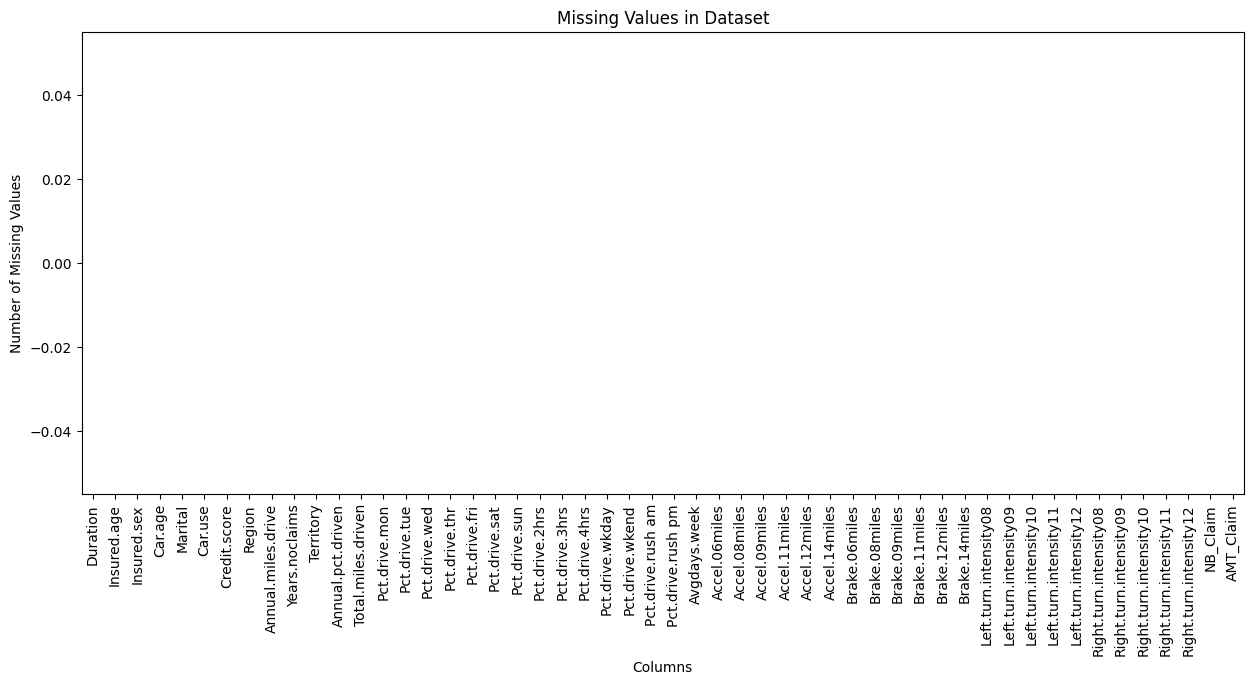

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame
missing_values = df.isnull().sum()

# Plotting the missing values
missing_values.plot(kind='bar', figsize=(15, 6))
plt.title('Missing Values in Dataset')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.show()

### numerical values

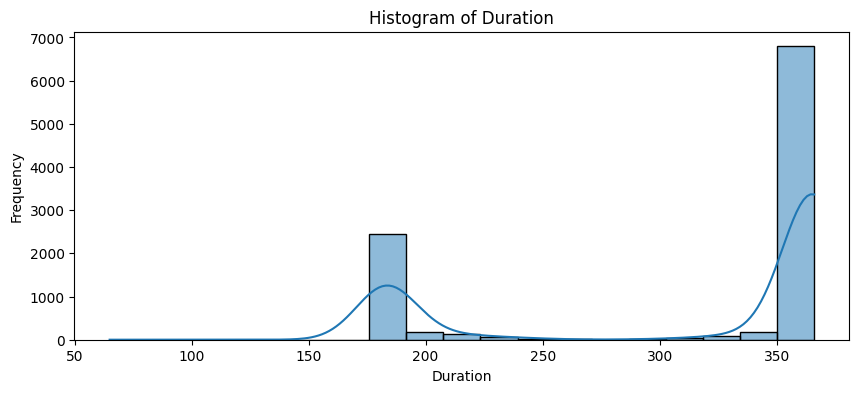

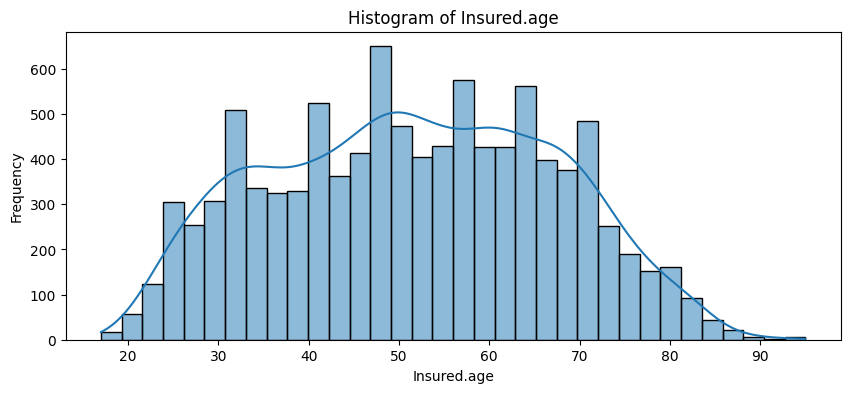

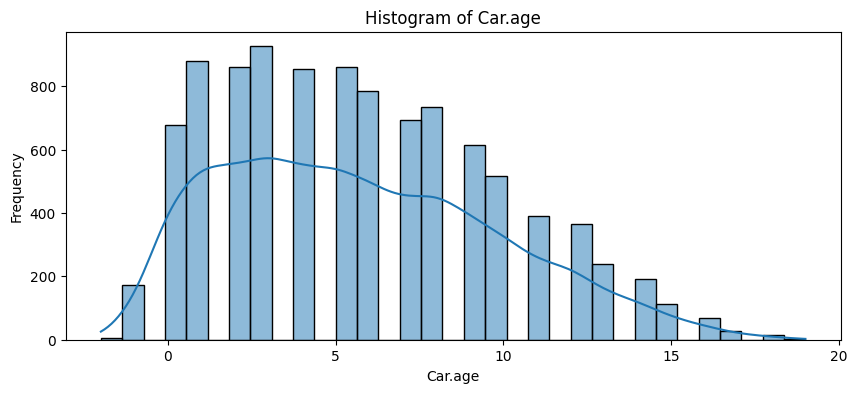

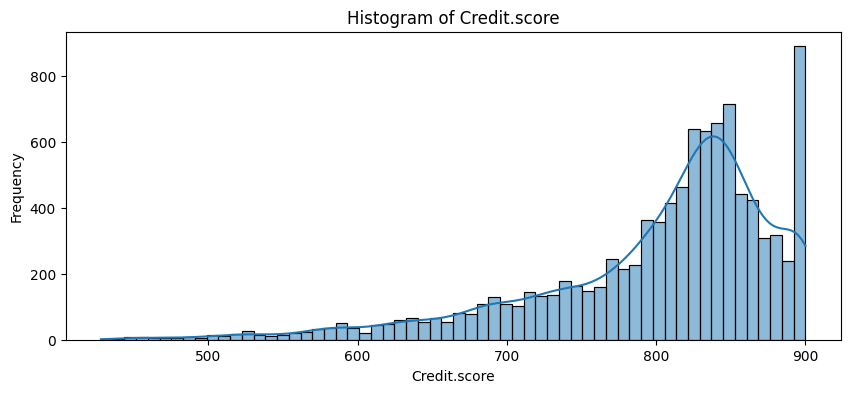

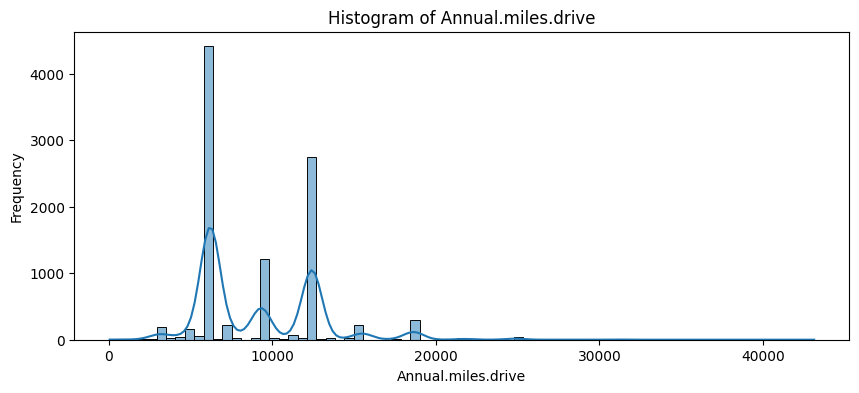

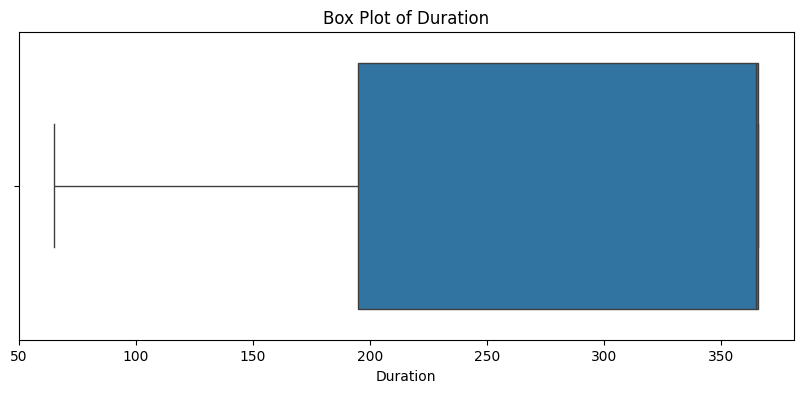

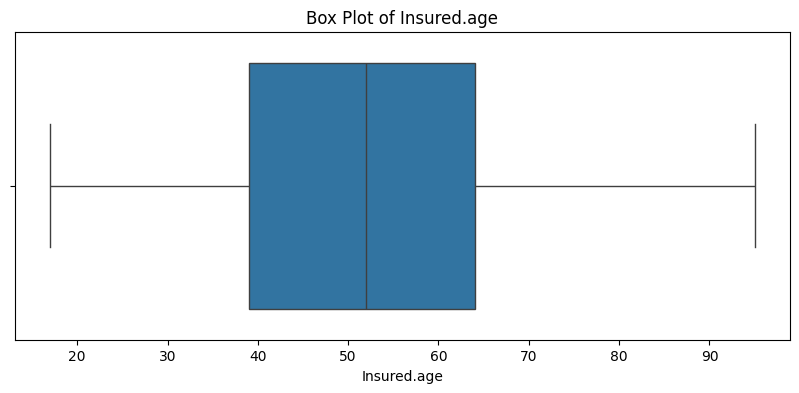

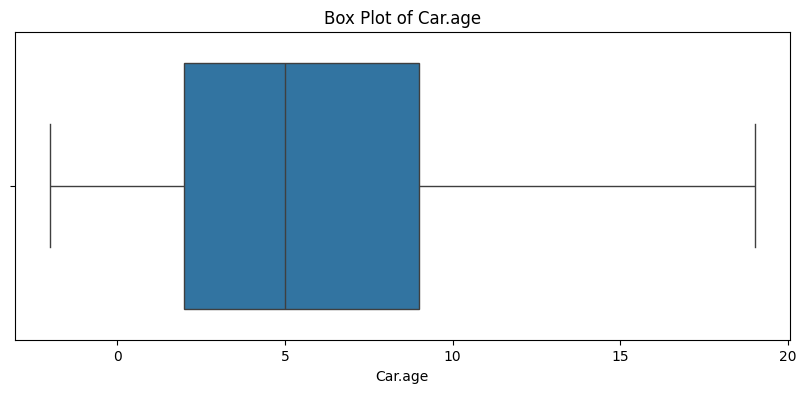

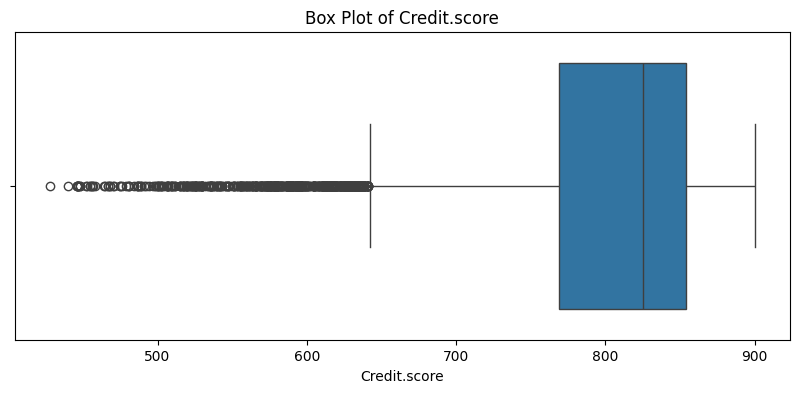

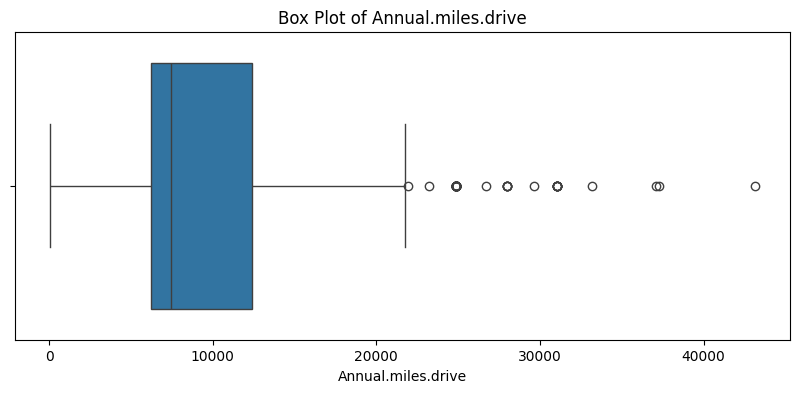

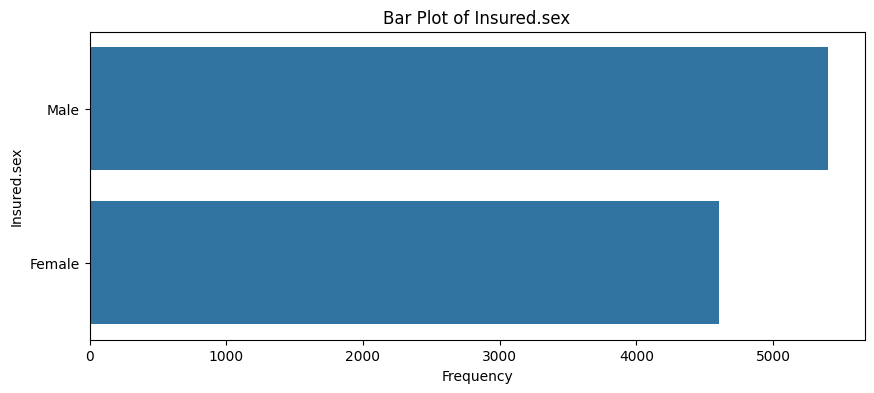

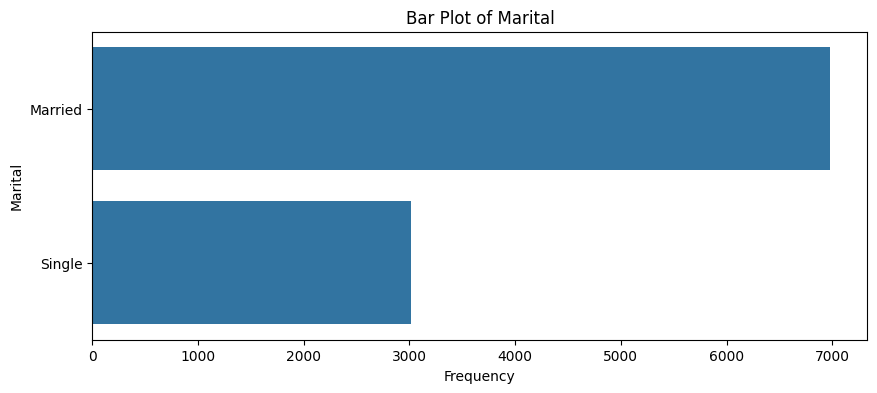

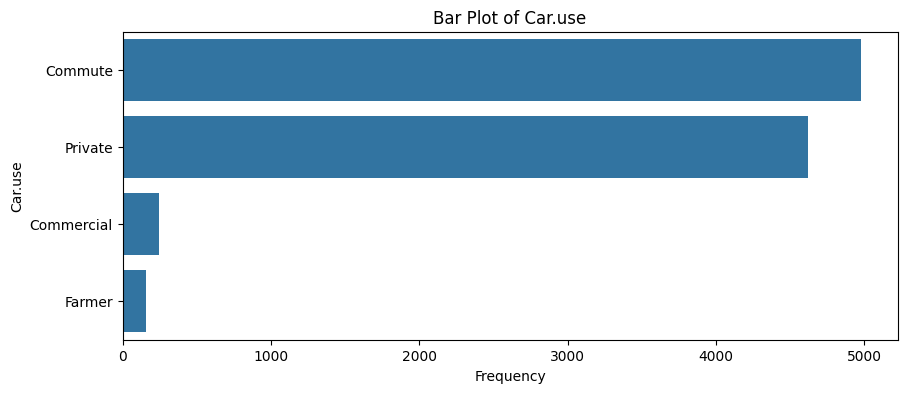

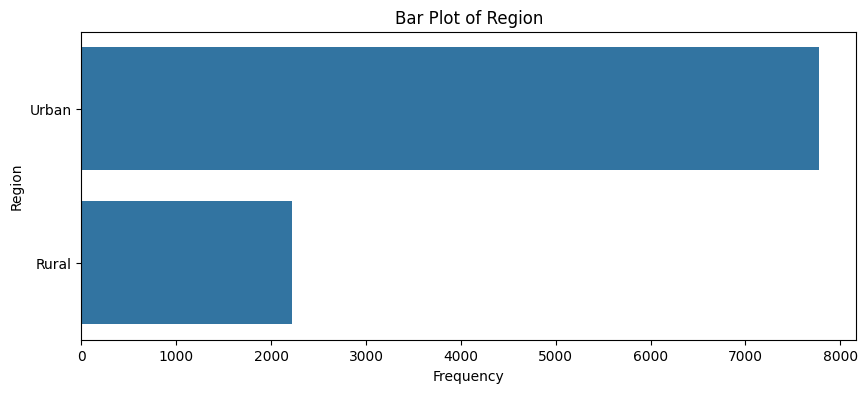

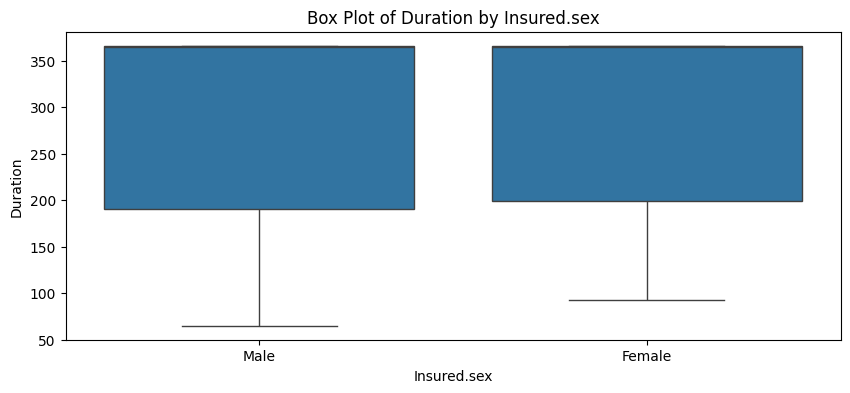

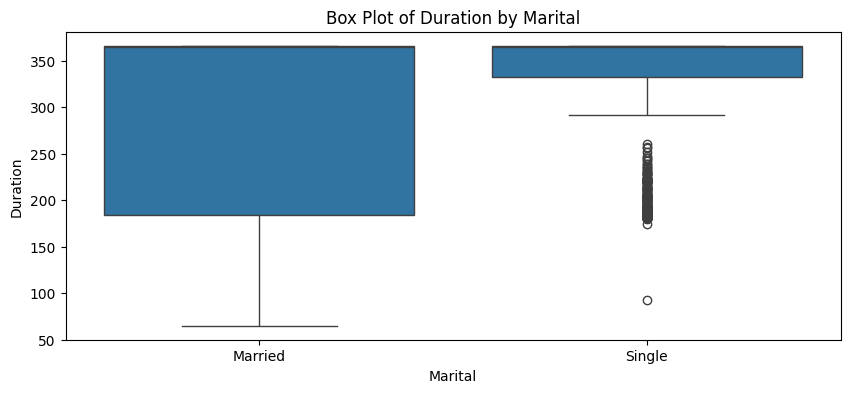

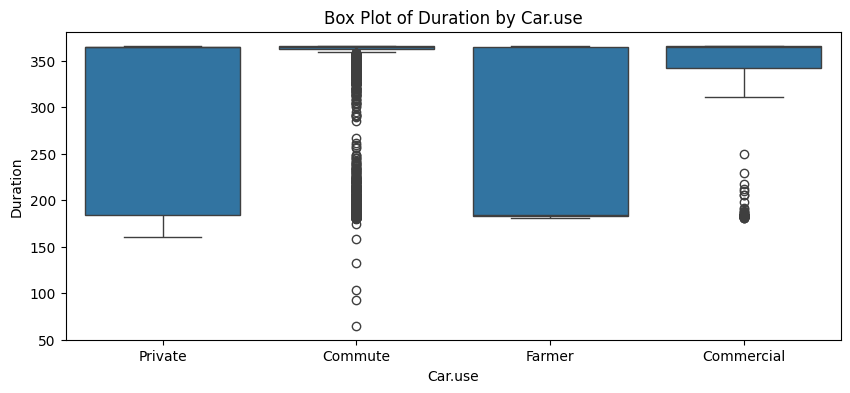

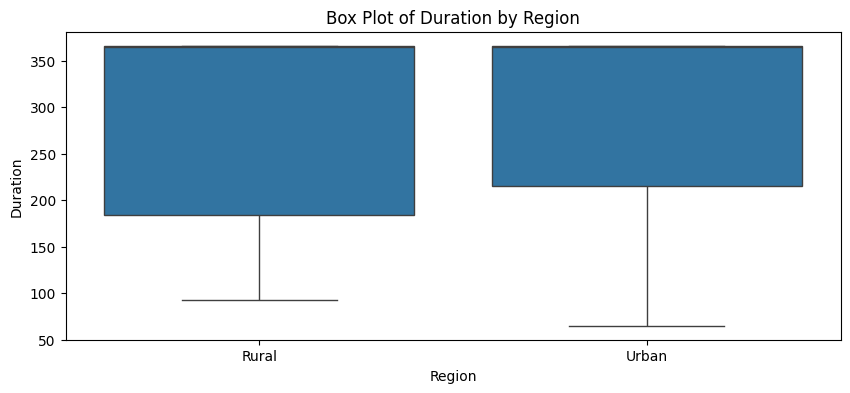

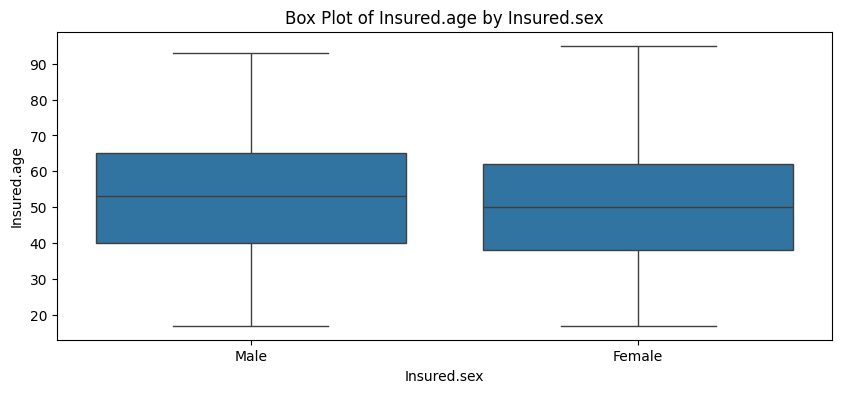

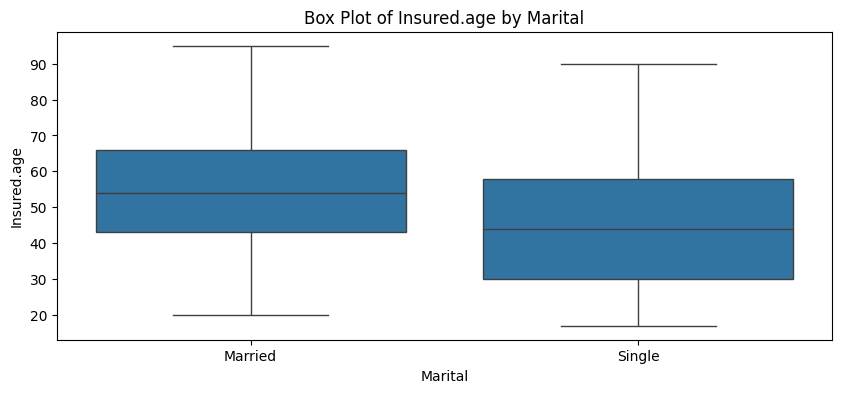

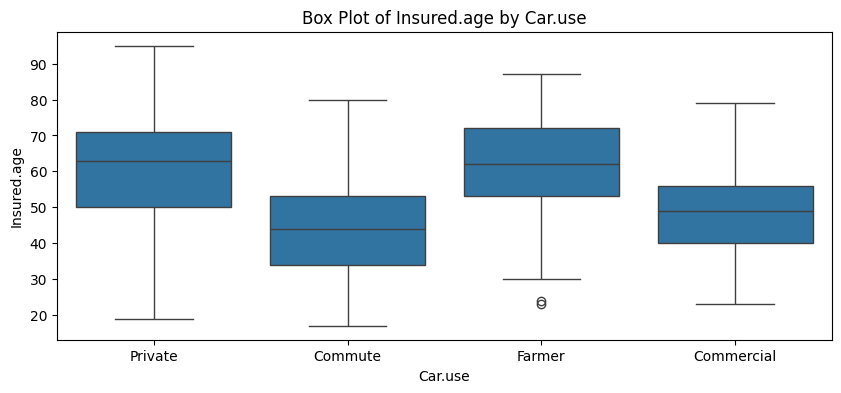

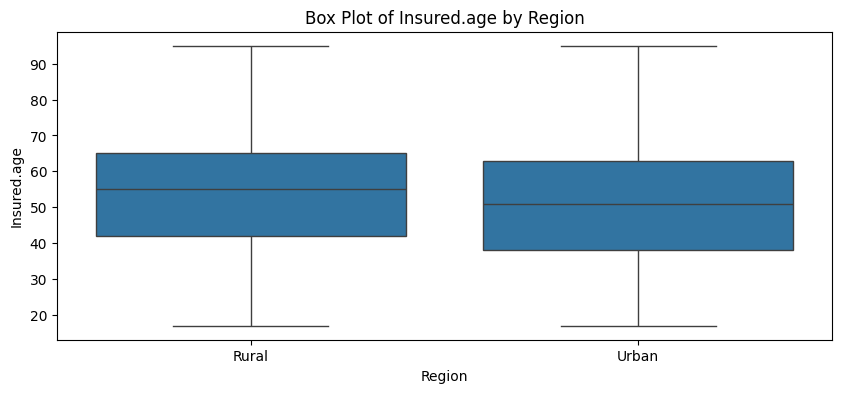

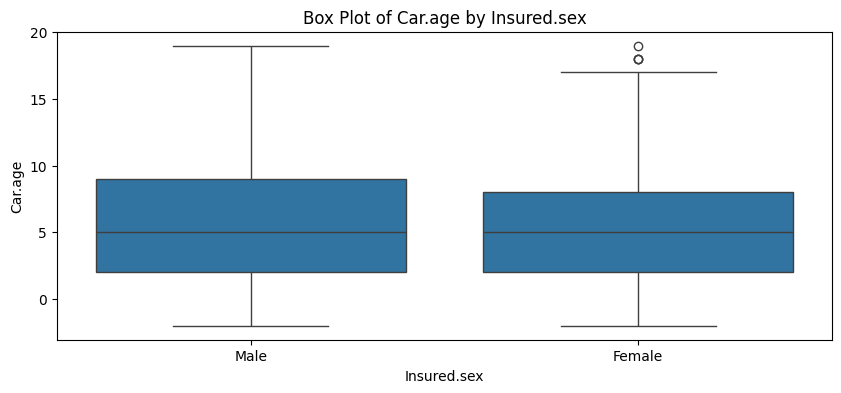

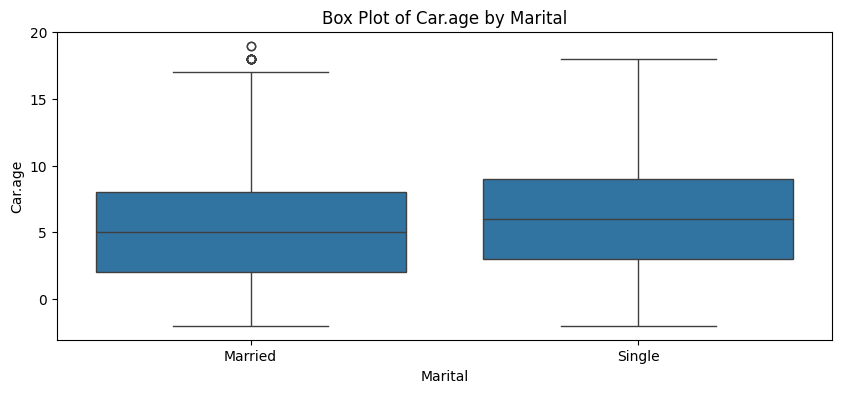

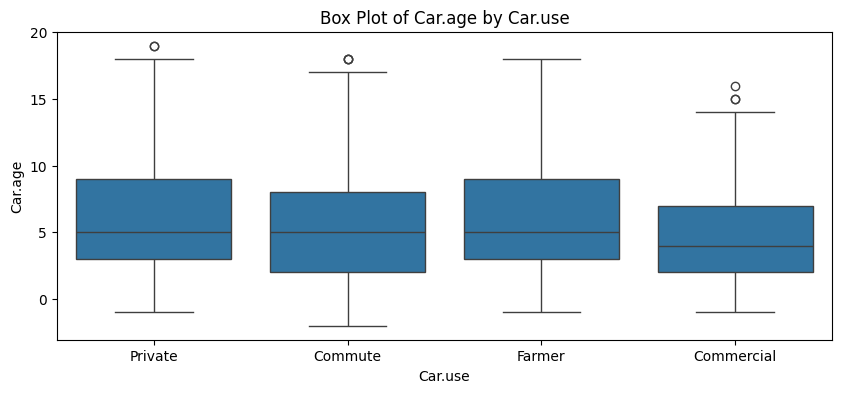

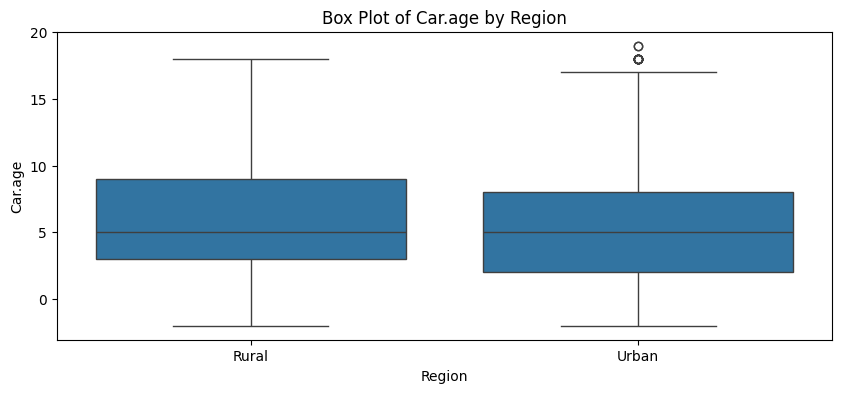

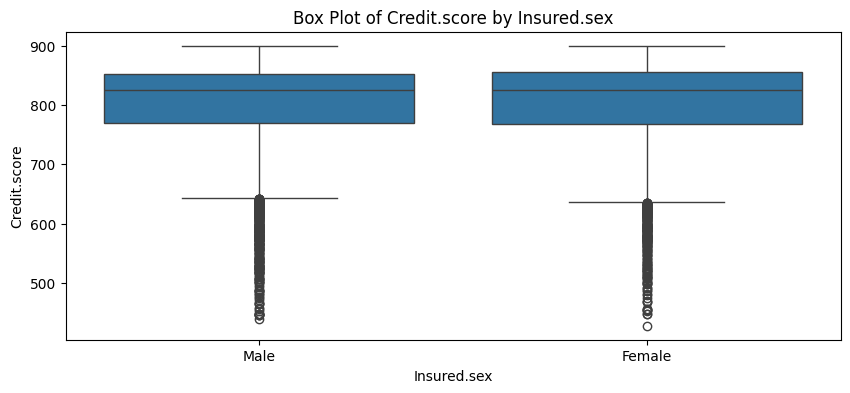

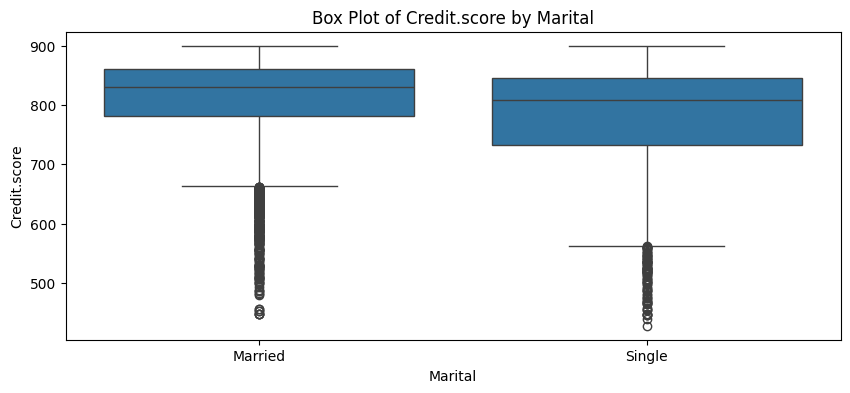

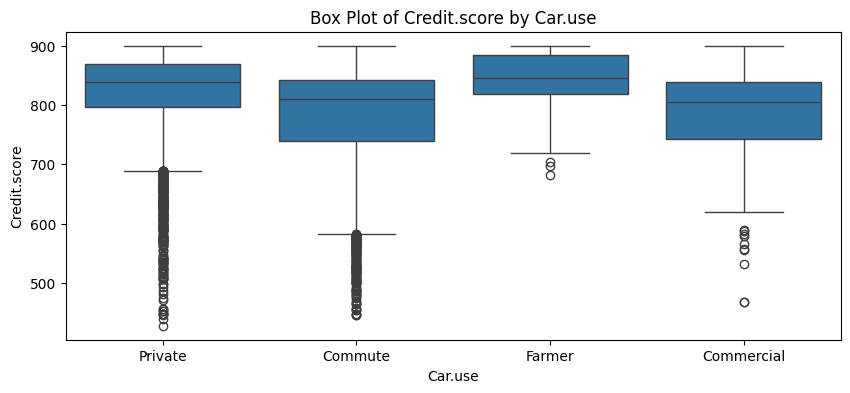

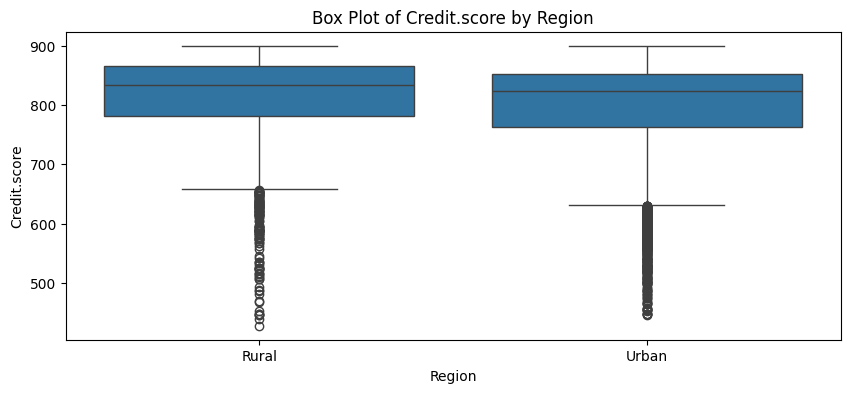

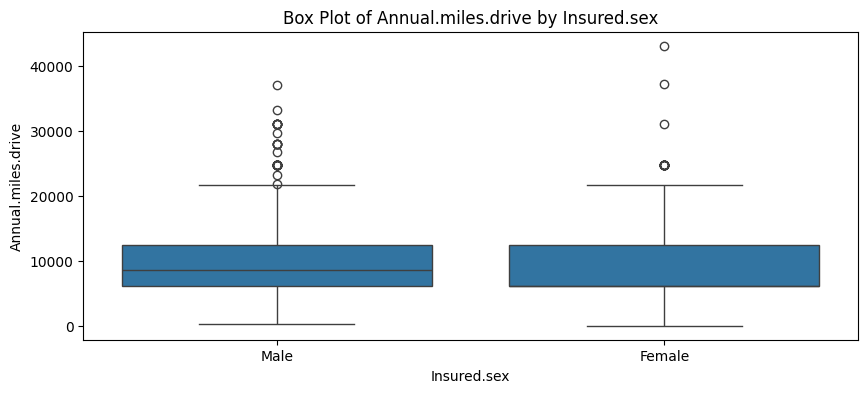

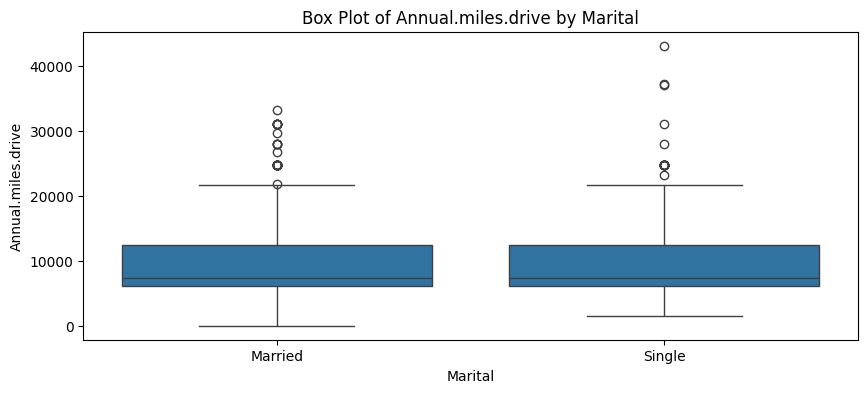

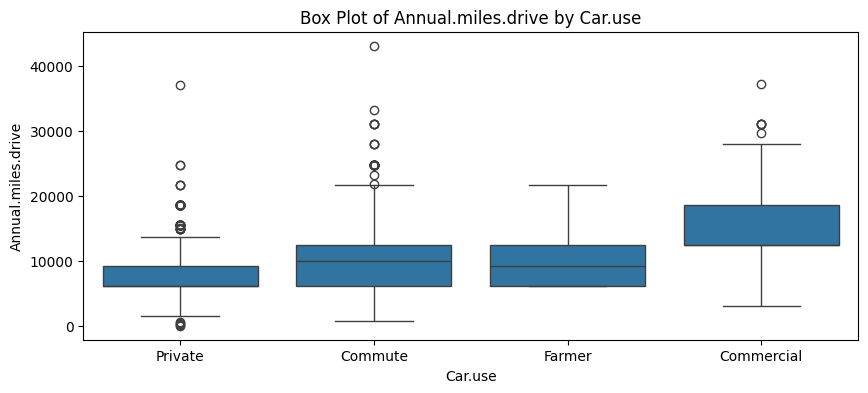

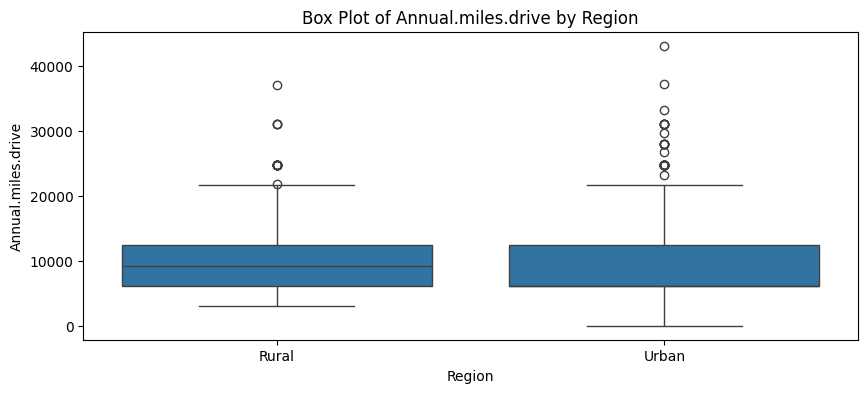

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Categorical columns
categorical_columns = ['Insured.sex', 'Marital', 'Car.use', 'Region']

# Subsample the data if necessary (e.g., 10% of the data)
sample_size = int(len(df) * 0.1)
df_sample = df.sample(n=sample_size, random_state=42)

# Plot histograms for numerical columns
for column in numerical_columns[:5]:  # Limit to first 5 numerical columns
    plt.figure(figsize=(10, 4))
    sns.histplot(df_sample[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Plot box plots for numerical columns
for column in numerical_columns[:5]:  # Limit to first 5 numerical columns
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df_sample[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()

# Plot bar plots for categorical columns
for column in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(y=df_sample[column], order=df_sample[column].value_counts().index)
    plt.title(f'Bar Plot of {column}')
    plt.xlabel('Frequency')
    plt.ylabel(column)
    plt.show()

# Plot box plots for numerical columns grouped by categorical columns
for num_col in numerical_columns[:5]:  # Limit to first 5 numerical columns
    for cat_col in categorical_columns:
        plt.figure(figsize=(10, 4))
        sns.boxplot(x=df_sample[cat_col], y=df_sample[num_col])
        plt.title(f'Box Plot of {num_col} by {cat_col}')
        plt.xlabel(cat_col)
        plt.ylabel(num_col)
        plt.show()



### heatmap

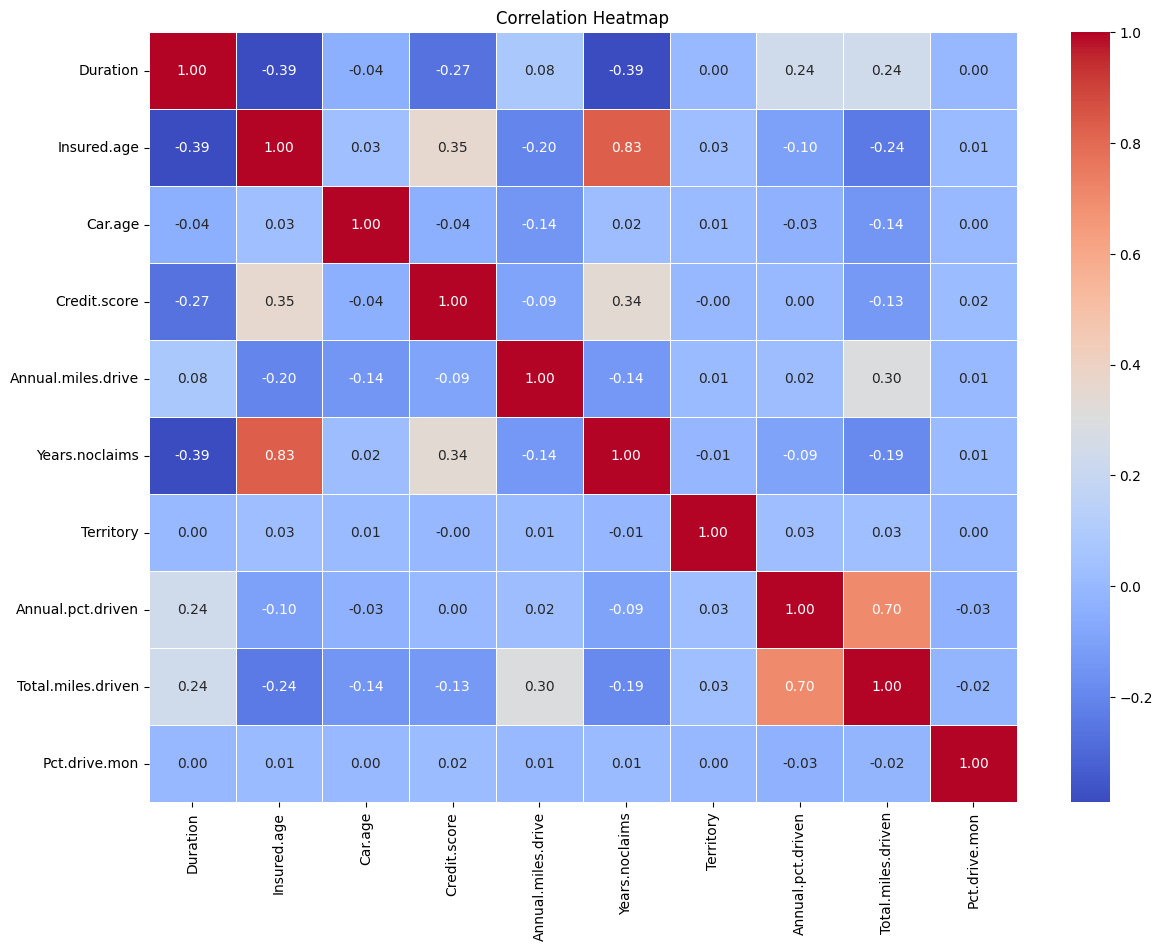

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Select a subset of numerical columns for the heatmap (e.g., first 10 columns)
subset_columns = numerical_columns[:10]

# Compute the correlation matrix for the subset
correlation_matrix = df[subset_columns].corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Develop model

In [9]:
!pip install pytorch_tabnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 1.7 MB/s eta 0:00:00


## Import Necessary Libraries

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb
import torch
from pytorch_tabnet.tab_model import TabNetClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



## Load and Prepare the Data

In [11]:
# Assuming 'df' is your DataFrame and 'NB_Claim' is the target column
X = df.drop('NB_Claim', axis=1)
y = df['NB_Claim']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Preprocess the Data

In [12]:
# Identify numerical and categorical columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

# Create transformers
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a preprocessor pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit and transform the training data
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Transform the testing data
X_test_preprocessed = preprocessor.transform(X_test)


1. It identifies numerical and categorical columns in the dataset `X`.
2. It creates transformers for standardizing numerical features and one-hot encoding categorical features.
3. It constructs a preprocessor pipeline using the `ColumnTransformer` that applies the respective transformers to numerical and categorical features.
4. It fits and transforms the training data `X_train` using the preprocessor pipeline.
5. It transforms the testing data `X_test` using the preprocessor pipeline.

In summary, the code preprocesses the data by standardizing numerical features and one-hot encoding categorical features for both the training and testing datasets.


## Explain the code

The preprocessing is designed to handle both numerical and categorical features in a dataset, which is essential for preparing data for machine learning models. Here's a breakdown of why each step is necessary:

1. **Identify Numerical and Categorical Columns**:
   - `numerical_features = X.select_dtypes(include=['int64', 'float64']).columns`: This line selects columns that contain numerical data (integers and floating-point numbers). Numerical features are typically continuous values that can be scaled and normalized.
   - `categorical_features = X.select_dtypes(include=['object', 'category']).columns`: This line selects columns that contain categorical data (strings or categorical types). Categorical features are typically discrete values that need to be encoded into numerical formats.

2. **Create Transformers**:
   - `numerical_transformer = StandardScaler()`: The `StandardScaler` is used to standardize numerical features by removing the mean and scaling to unit variance. This ensures that all numerical features have a similar scale, which is important for many machine learning algorithms.
   - `categorical_transformer = OneHotEncoder(handle_unknown='ignore')`: The `OneHotEncoder` is used to convert categorical features into a format that can be provided to machine learning algorithms. It creates binary columns for each category, indicating the presence or absence of a category. The `handle_unknown='ignore'` parameter ensures that the encoder can handle unseen categories during testing without raising an error.

3. **Create a Preprocessor Pipeline**:
   - `preprocessor = ColumnTransformer(transformers=[('num', numerical_transformer, numerical_features), ('cat', categorical_transformer, categorical_features)])`: The `ColumnTransformer` is used to apply different preprocessing steps to different columns of the dataset. It allows you to specify which transformer to use for which set of columns, making it easy to handle mixed data types.

4. **Fit and Transform the Training Data**:
   - `X_train_preprocessed = preprocessor.fit_transform(X_train)`: This line fits the preprocessor on the training data and then transforms it. The `fit_transform` method learns the parameters (e.g., mean and standard deviation for `StandardScaler`, and category mappings for `OneHotEncoder`) from the training data and applies the transformations.

5. **Transform the Testing Data**:
   - `X_test_preprocessed = preprocessor.transform(X_test)`: This line applies the same transformations to the testing data using the parameters learned from the training data. It is crucial to use the same preprocessing steps for both training and testing data to ensure consistency and avoid data leakage.

By following these steps, the preprocessing code ensures that both numerical and categorical features are properly transformed and ready for machine learning models. This approach helps improve the performance and reliability of the models by handling different types of data appropriately.

# Initialize and Train the Models

## TabNet

In [13]:
# Initialize the TabNet model
tabnet_model = TabNetClassifier()

# Train the TabNet model
tabnet_model.fit(
    X_train_preprocessed, y_train,
    eval_set=[(X_test_preprocessed, y_test)],
    max_epochs=100
)

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.3634  | val_0_accuracy: 0.9564  |  0:00:06s
epoch 1  | loss: 0.15222 | val_0_accuracy: 0.95645 |  0:00:12s
epoch 2  | loss: 0.08932 | val_0_accuracy: 0.98245 |  0:00:18s
epoch 3  | loss: 0.06088 | val_0_accuracy: 0.98925 |  0:00:24s
epoch 4  | loss: 0.05481 | val_0_accuracy: 0.9902  |  0:00:30s
epoch 5  | loss: 0.04766 | val_0_accuracy: 0.9903  |  0:00:36s
epoch 6  | loss: 0.0456  | val_0_accuracy: 0.9909  |  0:00:42s
epoch 7  | loss: 0.04407 | val_0_accuracy: 0.99135 |  0:00:48s
epoch 8  | loss: 0.0425  | val_0_accuracy: 0.992   |  0:00:53s
epoch 9  | loss: 0.04258 | val_0_accuracy: 0.9919  |  0:01:00s
epoch 10 | loss: 0.04001 | val_0_accuracy: 0.99215 |  0:01:05s
epoch 11 | loss: 0.03958 | val_0_accuracy: 0.9925  |  0:01:11s
epoch 12 | loss: 0.03884 | val_0_accuracy: 0.9923  |  0:01:17s
epoch 13 | loss: 0.03849 | val_0_accuracy: 0.9926  |  0:01:23s
epoch 14 | loss: 0.03812 | val_0_accuracy: 0.9924  |  0:01:29s
epoch 15 | loss: 0.03882 | val_0_accuracy: 0.99285 |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


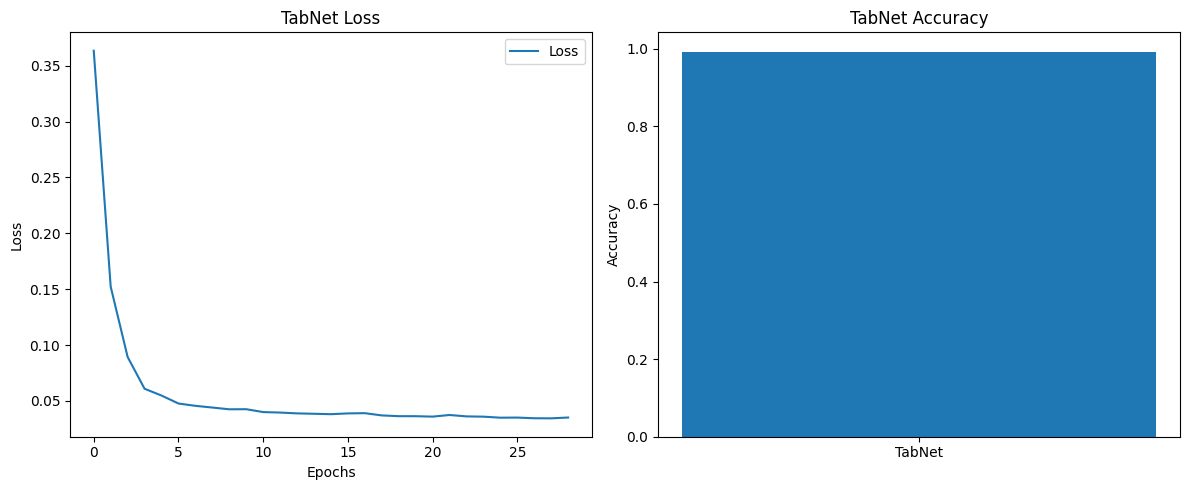

In [14]:

# Store the loss values
tabnet_loss = tabnet_model.history['loss']

# Make predictions on the test set
y_pred = tabnet_model.predict(X_test_preprocessed)

# Calculate accuracy
tabnet_accuracy = accuracy_score(y_test, y_pred)

# Plotting Loss and Accuracy for TabNet
plt.figure(figsize=(12, 5))

# Plotting Loss
plt.subplot(1, 2, 1)
plt.plot(tabnet_loss, label='Loss')
plt.title('TabNet Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting Accuracy
plt.subplot(1, 2, 2)
plt.bar(['TabNet'], [tabnet_accuracy])
plt.title('TabNet Accuracy')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

## XGBoost

In [15]:
# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Train the XGBoost model
xgb_model.fit(X_train_preprocessed, y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

[0]	validation_0-mlogloss:0.86131	validation_1-mlogloss:0.86222
[1]	validation_0-mlogloss:0.59197	validation_1-mlogloss:0.59348
[2]	validation_0-mlogloss:0.42250	validation_1-mlogloss:0.42450
[3]	validation_0-mlogloss:0.30848	validation_1-mlogloss:0.31088
[4]	validation_0-mlogloss:0.22903	validation_1-mlogloss:0.23186
[5]	validation_0-mlogloss:0.17269	validation_1-mlogloss:0.17590
[6]	validation_0-mlogloss:0.13229	validation_1-mlogloss:0.13599
[7]	validation_0-mlogloss:0.10286	validation_1-mlogloss:0.10705
[8]	validation_0-mlogloss:0.08144	validation_1-mlogloss:0.08619
[9]	validation_0-mlogloss:0.06567	validation_1-mlogloss:0.07088
[10]	validation_0-mlogloss:0.05411	validation_1-mlogloss:0.05980
[11]	validation_0-mlogloss:0.04555	validation_1-mlogloss:0.05170
[12]	validation_0-mlogloss:0.03916	validation_1-mlogloss:0.04573
[13]	validation_0-mlogloss:0.03433	validation_1-mlogloss:0.04129
[14]	validation_0-mlogloss:0.03053	validation_1-mlogloss:0.03817
[15]	validation_0-mlogloss:0.02763	

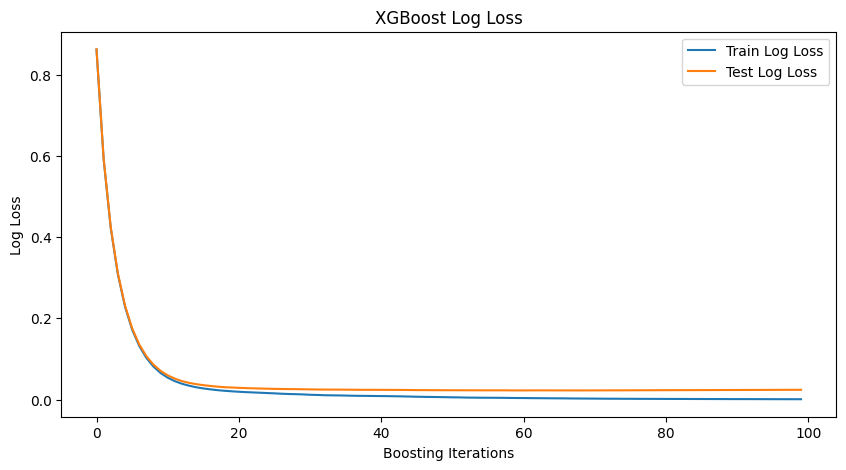

In [19]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(objective='multi:softprob', random_state=42, eval_metric="mlogloss") # Pass eval_metric here

# Train the XGBoost model with evaluation metrics tracking
evals = [(X_train_preprocessed, y_train), (X_test_preprocessed, y_test)]  # Evaluation set

# Instead of early_stopping_rounds in fit, let's supply it to train.
# verbose is replaced by verbosity
# eval_set is not a valid parameter in fit, rather eval_set is valid with xgb.train
# Instead of using fit, we will now use xgb.train.
# In xgb.train, we will pass the parameters of XGBClassifier which can be obtained using xgb_model.get_xgb_params().
# Fit method should not be used when early_stopping_rounds is being used.

xgb_model.fit(X_train_preprocessed, y_train,  eval_set=evals, verbose=True) #Early stopping is automatically enabled, Removed eval_metric from here

# Plotting the training and validation loss
results = xgb_model.evals_result()

plt.figure(figsize=(10, 5))
plt.plot(results['validation_0']['mlogloss'], label='Train Log Loss')
plt.plot(results['validation_1']['mlogloss'], label='Test Log Loss')
plt.title('XGBoost Log Loss')
plt.xlabel('Boosting Iterations')
plt.ylabel('Log Loss')
plt.legend()
plt.show()

Train Accuracy: 1.0000
Test Accuracy: 0.9956


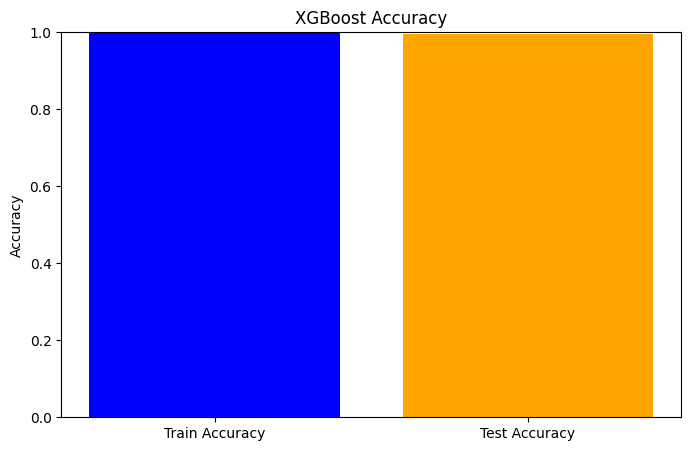

In [20]:
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(objective='multi:softprob', random_state=42)

# Train the XGBoost model
xgb_model.fit(X_train_preprocessed, y_train)

# Make predictions on the training and test sets
y_train_pred = xgb_model.predict(X_train_preprocessed)
y_test_pred = xgb_model.predict(X_test_preprocessed)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Optionally, plot the accuracies (if you want to visualize it)
accuracies = [train_accuracy, test_accuracy]
labels = ['Train Accuracy', 'Test Accuracy']

plt.figure(figsize=(8, 5))
plt.bar(labels, accuracies, color=['blue', 'orange'])
plt.ylim(0, 1)
plt.title('XGBoost Accuracy')
plt.ylabel('Accuracy')
plt.show()



## Logistic Regression


In [21]:
# Initialize the Logistic Regression model
lr_model = LogisticRegression(random_state=42)

# Train the Logistic Regression model
lr_model.fit(X_train_preprocessed, y_train)

LogisticRegression(random_state=42)

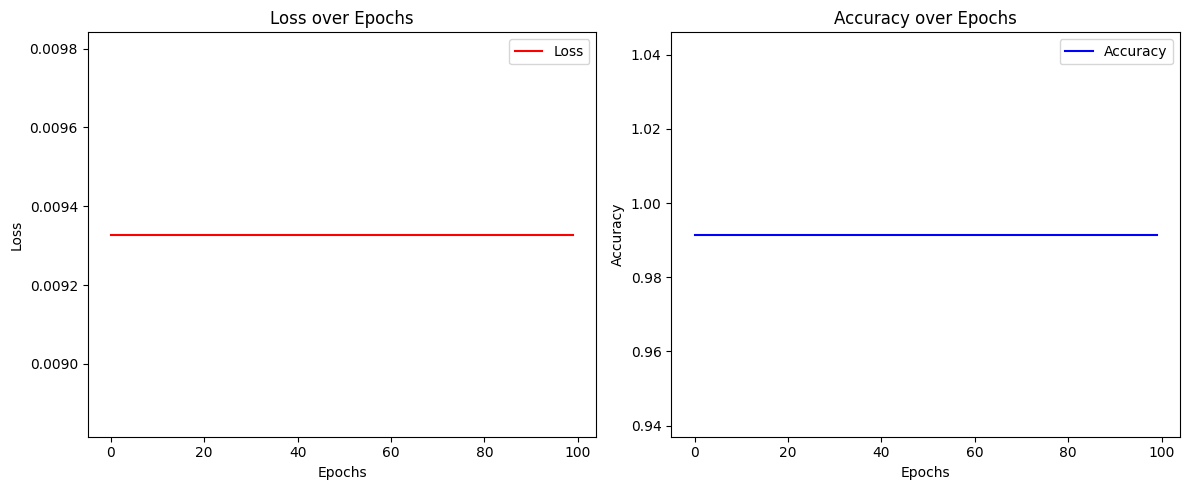

In [22]:
from sklearn.linear_model import LogisticRegression
import numpy as np

# Initialize the Logistic Regression model
lr_model = LogisticRegression(random_state=42)

# Create lists to store loss and accuracy
losses = []
accuracies = []

# Custom training loop to track loss and accuracy
for epoch in range(100):  # Adjust the number of epochs as needed
    lr_model.fit(X_train_preprocessed, y_train)

    # Calculate predictions and loss
    y_pred = lr_model.predict(X_train_preprocessed)
    accuracy = accuracy_score(y_train, y_pred)
    loss = np.mean((y_train - lr_model.predict_proba(X_train_preprocessed)[:, 1]) ** 2)  # Mean Squared Error as loss

    # Store the loss and accuracy
    losses.append(loss)
    accuracies.append(accuracy)

# Plotting loss and accuracy
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(losses, label='Loss', color='red')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(accuracies, label='Accuracy', color='blue')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


# Evaluate the Models

## TabNet

In [23]:
# Evaluate TabNet
tabnet_preds = tabnet_model.predict(X_test_preprocessed)
print("TabNet Accuracy:", accuracy_score(y_test, tabnet_preds))
print("TabNet Classification Report:\n", classification_report(y_test, tabnet_preds))

TabNet Accuracy: 0.9929
TabNet Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19130
           1       0.94      0.89      0.91       821
           2       0.00      0.00      0.00        47
           3       0.00      0.00      0.00         2

    accuracy                           0.99     20000
   macro avg       0.48      0.47      0.48     20000
weighted avg       0.99      0.99      0.99     20000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In the classification report, the "support" column represents the number of instances (samples) in the test set for each class.

Specifically, the classification report shows:

- For class 0: 19,130 instances
- For class 1: 821 instances
- For class 2: 47 instances
- For class 3: 2 instances

The total number of instances in the test set is 20,000 (the sum of the support values for all classes).

The "support" column is important because it provides context for interpreting the other metrics, such as precision, recall, and F1-score. These metrics are calculated based on the number of true positives, false positives, and false negatives, which are influenced by the number of instances (support) for each class.

In a well-balanced dataset, the support values for each class would be similar. However, in real-world scenarios, class imbalance is common, and the support values can vary significantly between classes, which is important to consider when evaluating model performance.


In the classification report, the "macro avg" and "weighted avg" rows provide additional summary metrics that aggregate the per-class metrics in different ways:

1. **Macro Average**:
   - The macro average is calculated by taking the unweighted mean of the per-class metrics (precision, recall, F1-score).
   - It gives equal importance to each class, regardless of the number of instances (support) in the test set.
   - The macro average is useful when you want to evaluate the overall performance of the model across all classes, treating each class equally.

2. **Weighted Average**:
   - The weighted average is calculated by taking the average of the per-class metrics, weighted by the number of instances (support) for each class.
   - It gives more importance to the classes with a larger number of instances.
   - The weighted average is useful when you want to evaluate the overall performance of the model, considering the relative importance of each class based on the number of instances.

In the example you provided:

- The macro average precision, recall, and F1-score are all 0.48, indicating that the model's performance is relatively poor when considering each class equally.
- The weighted average precision, recall, and F1-score are all 0.99, indicating that the model's performance is very good when considering the relative importance of each class based on the number of instances.

The choice of using macro average or weighted average depends on the specific problem and the importance you place on the performance of each class. Macro average is useful when you want to ensure the model performs well on all classes, while weighted average is useful when the class distribution in the test set is more important.

## XGBoost

In [24]:
# Evaluate XGBoost
xgb_preds = xgb_model.predict(X_test_preprocessed)
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_preds))
print("XGBoost Classification Report:\n", classification_report(y_test, xgb_preds))

XGBoost Accuracy: 0.9956
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19130
           1       0.98      0.91      0.94       821
           2       0.97      0.66      0.78        47
           3       1.00      0.50      0.67         2

    accuracy                           1.00     20000
   macro avg       0.99      0.77      0.85     20000
weighted avg       1.00      1.00      1.00     20000



## Logistic Regression

In [25]:
# Evaluate Logistic Regression
lr_preds = lr_model.predict(X_test_preprocessed)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_preds))
print("Logistic Regression Classification Report:\n", classification_report(y_test, lr_preds))

Logistic Regression Accuracy: 0.99115
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     19130
           1       0.94      0.84      0.89       821
           2       0.50      0.04      0.08        47
           3       0.00      0.00      0.00         2

    accuracy                           0.99     20000
   macro avg       0.61      0.47      0.49     20000
weighted avg       0.99      0.99      0.99     20000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Evaluate all Models

TabNet Accuracy: 0.9929
TabNet Precision: 0.9927838064318228
TabNet Recall: 0.9929
TabNet F1 Score: 0.9915814326407041
TabNet Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19130
           1       0.94      0.89      0.91       821
           2       1.00      0.00      0.00        47
           3       1.00      0.00      0.00         2

    accuracy                           0.99     20000
   macro avg       0.98      0.47      0.48     20000
weighted avg       0.99      0.99      0.99     20000



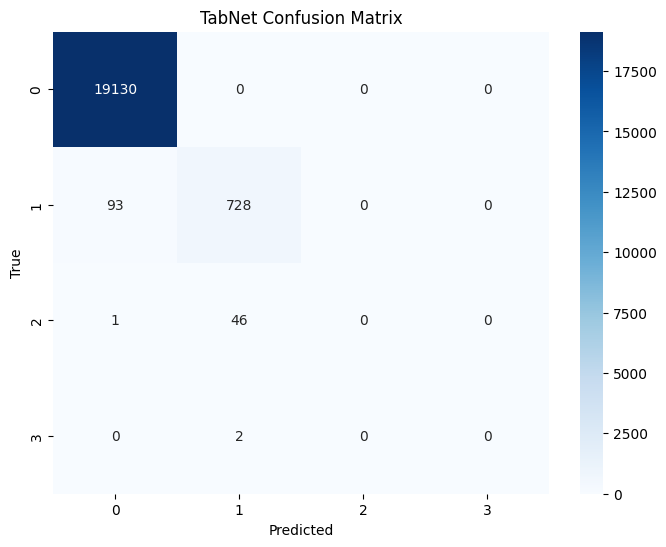

TabNet AUC: 0.9774592155259336


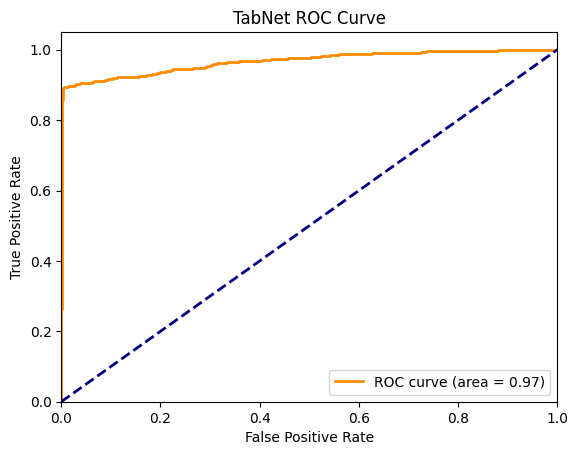

XGBoost Accuracy: 0.9956
XGBoost Precision: 0.9955279242654418
XGBoost Recall: 0.9956
XGBoost F1 Score: 0.9954421255583956
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19130
           1       0.98      0.91      0.94       821
           2       0.97      0.66      0.78        47
           3       1.00      0.50      0.67         2

    accuracy                           1.00     20000
   macro avg       0.99      0.77      0.85     20000
weighted avg       1.00      1.00      1.00     20000



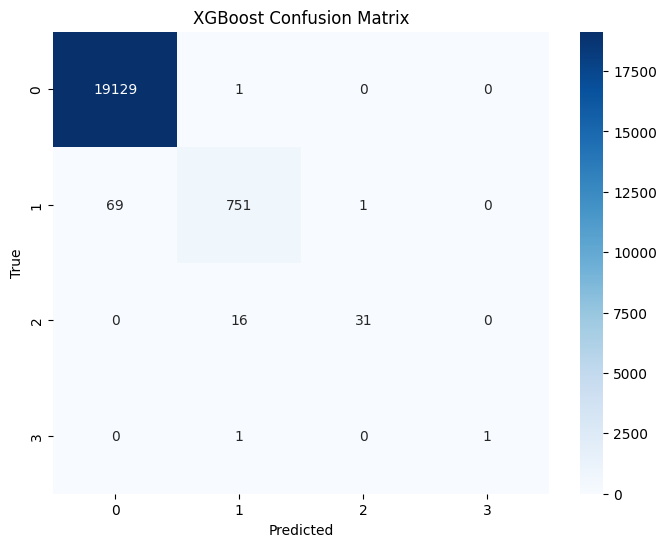

XGBoost AUC: 0.9924201312477279


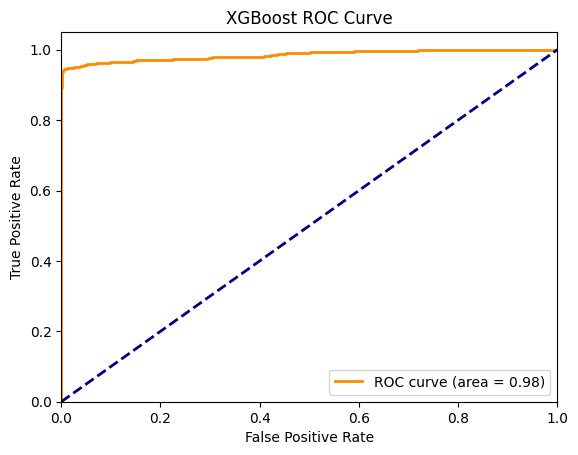

Logistic Regression Accuracy: 0.99115
Logistic Regression Precision: 0.9898560593514121
Logistic Regression Recall: 0.99115
Logistic Regression F1 Score: 0.9898829235998623
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     19130
           1       0.94      0.84      0.89       821
           2       0.50      0.04      0.08        47
           3       1.00      0.00      0.00         2

    accuracy                           0.99     20000
   macro avg       0.86      0.47      0.49     20000
weighted avg       0.99      0.99      0.99     20000



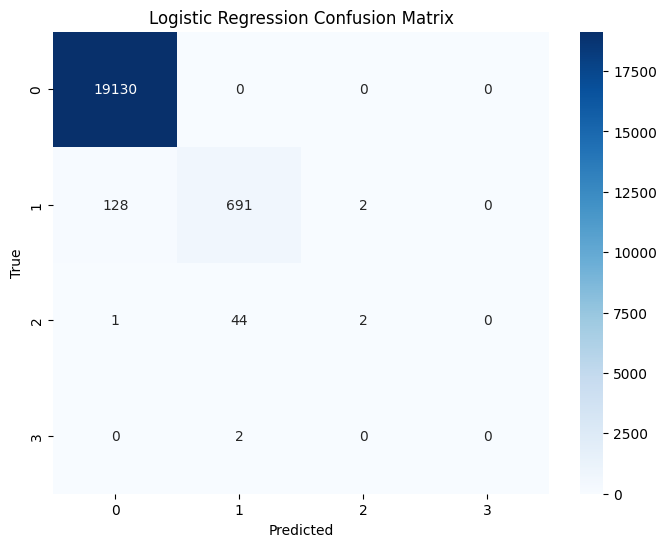

Logistic Regression AUC: 0.9844424540706043


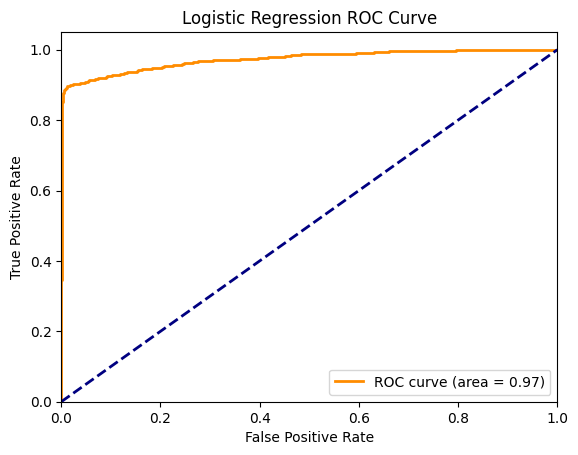

In [26]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

    print(f"{model_name} Accuracy: {accuracy}")
    print(f"{model_name} Precision: {precision}")
    print(f"{model_name} Recall: {recall}")
    print(f"{model_name} F1 Score: {f1}")
    print(f"{model_name} Classification Report:\n", classification_report(y_test, y_pred, zero_division=1))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

    try:
        y_pred_proba = model.predict_proba(X_test)
        auc_score = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
        print(f"{model_name} AUC: {auc_score}")

        fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1], pos_label=1)
        roc_auc = auc(fpr, tpr)

        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{model_name} ROC Curve')
        plt.legend(loc="lower right")
        plt.show()
    except AttributeError:
        print(f"{model_name} does not support predict_proba, skipping AUC and ROC curve.")
    except ValueError as e:
        print(f"{model_name} encountered an error with ROC curve calculation: {e}")

evaluate_model(tabnet_model, X_test_preprocessed, y_test, "TabNet")
evaluate_model(xgb_model, X_test_preprocessed, y_test, "XGBoost")
evaluate_model(lr_model, X_test_preprocessed, y_test, "Logistic Regression")

TabNet Matthews Correlation Coefficient: 0.9117611717249376
TabNet AUC: 0.9774592155259336


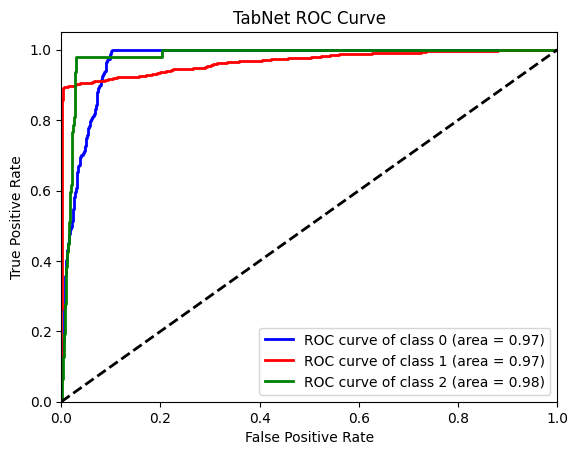

XGBoost Matthews Correlation Coefficient: 0.9460288243100726
XGBoost AUC: 0.9924201312477279


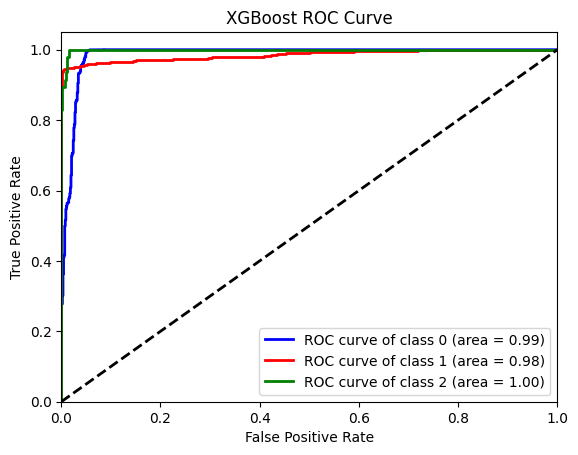

Logistic Regression Matthews Correlation Coefficient: 0.8887578251539522
Logistic Regression AUC: 0.9844424540706043


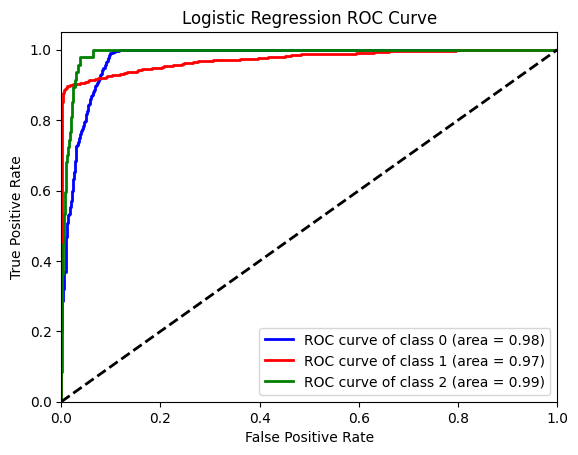

In [27]:
from sklearn.metrics import matthews_corrcoef, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

def calculate_mcc_and_auc(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)

    # Calculate Matthews Correlation Coefficient (MCC)
    mcc = matthews_corrcoef(y_test, y_pred)
    print(f"{model_name} Matthews Correlation Coefficient: {mcc}")

    try:
        # Calculate AUC for multi-class
        y_pred_proba = model.predict_proba(X_test)
        auc_score = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
        print(f"{model_name} AUC: {auc_score}")

        # Plot ROC Curve for multi-class
        n_classes = y_pred_proba.shape[1]
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)
            roc_auc[i] = auc(fpr[i], tpr[i])

        plt.figure()
        colors = ['blue', 'red', 'green']
        for i, color in zip(range(n_classes), colors):
            plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')
        plt.plot([0, 1], [0, 1], 'k--', lw=2)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{model_name} ROC Curve')
        plt.legend(loc="lower right")
        plt.show()
    except AttributeError:
        print(f"{model_name} does not support predict_proba, skipping AUC and ROC curve.")
    except ValueError as e:
        print(f"{model_name} encountered an error with ROC curve calculation: {e}")

calculate_mcc_and_auc(tabnet_model, X_test_preprocessed, y_test, "TabNet")
calculate_mcc_and_auc(xgb_model, X_test_preprocessed, y_test, "XGBoost")
calculate_mcc_and_auc(lr_model, X_test_preprocessed, y_test, "Logistic Regression")

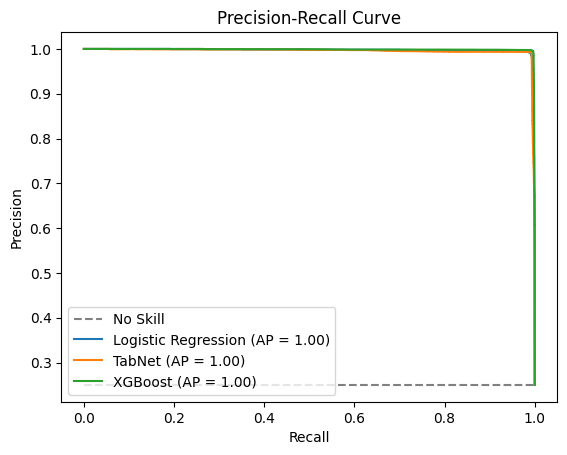

In [28]:
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt

def plot_precision_recall_curve(models, X_test, y_test, model_names):
    n_classes = len(np.unique(y_test))
    y_test = label_binarize(y_test, classes=np.unique(y_test))

    plt.figure()

    # No skill line
    no_skill = np.mean(y_test)
    plt.plot([0, 1], [no_skill, no_skill], color='gray', linestyle='--', label='No Skill')

    for model, model_name in zip(models, model_names):
        try:
            y_pred_proba = model.predict_proba(X_test)
            precision = dict()
            recall = dict()
            average_precision = dict()
            for i in range(n_classes):
                precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_pred_proba[:, i])
                average_precision[i] = average_precision_score(y_test[:, i], y_pred_proba[:, i])

            # Averaging precision-recall curves
            precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(), y_pred_proba.ravel())
            average_precision["micro"] = average_precision_score(y_test, y_pred_proba, average="micro")

            plt.plot(recall["micro"], precision["micro"], label=f'{model_name} (AP = {average_precision["micro"]:.2f})')
        except AttributeError:
            print(f"{model_name} does not support predict_proba, skipping precision-recall curve.")
        except ValueError as e:
            print(f"{model_name} encountered an error with precision-recall curve calculation: {e}")

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")
    plt.show()

# Example usage:
models = [lr_model, tabnet_model, xgb_model]
model_names = ["Logistic Regression", "TabNet", "XGBoost"]
plot_precision_recall_curve(models, X_test_preprocessed, y_test, model_names)

it seems like there is an issue with the precision-recall curve plot. The plot does not look correct, as the precision values are not decreasing monotonically with increasing recall, which is the expected behavior of a proper precision-recall curve.

Here are a few things you can try to troubleshoot and improve the plot:

1. **Check the data and preprocessing**: Ensure that the `X_test`, `y_test`, and the binarized `y_test` are correct and consistent. Double-check the preprocessing steps, especially the label binarization.

2. **Verify the `precision_recall_curve` and `average_precision_score` calculations**: Review the implementation of the `plot_precision_recall_curve` function to ensure that the precision-recall curve and average precision score are being calculated correctly for each model.

3. **Inspect the model predictions**: Print or inspect the model predictions (`y_pred`) to see if they are as expected. Verify that the models are making reasonable predictions on the test set.

4. **Try a simpler example**: Start with a simpler example, such as a binary classification problem, and ensure that the precision-recall curve is plotted correctly. Once you have a working example, gradually increase the complexity to your multi-class problem.

5. **Consult the scikit-learn documentation**: The scikit-learn documentation provides detailed information and examples on how to use the `precision_recall_curve` and `average_precision_score` functions. Refer to the documentation to ensure that you are using them correctly.

6. **Seek community support**: If you're still unable to resolve the issue, consider posting your question on a relevant online forum or community, such as the scikit-learn GitHub repository or the Machine Learning subreddit. The community may be able to provide more specific guidance based on your code and the problem you're trying to solve.

The goal is to identify the root cause of the issue and make the necessary corrections to the code to generate a correct and meaningful precision-recall curve plot.

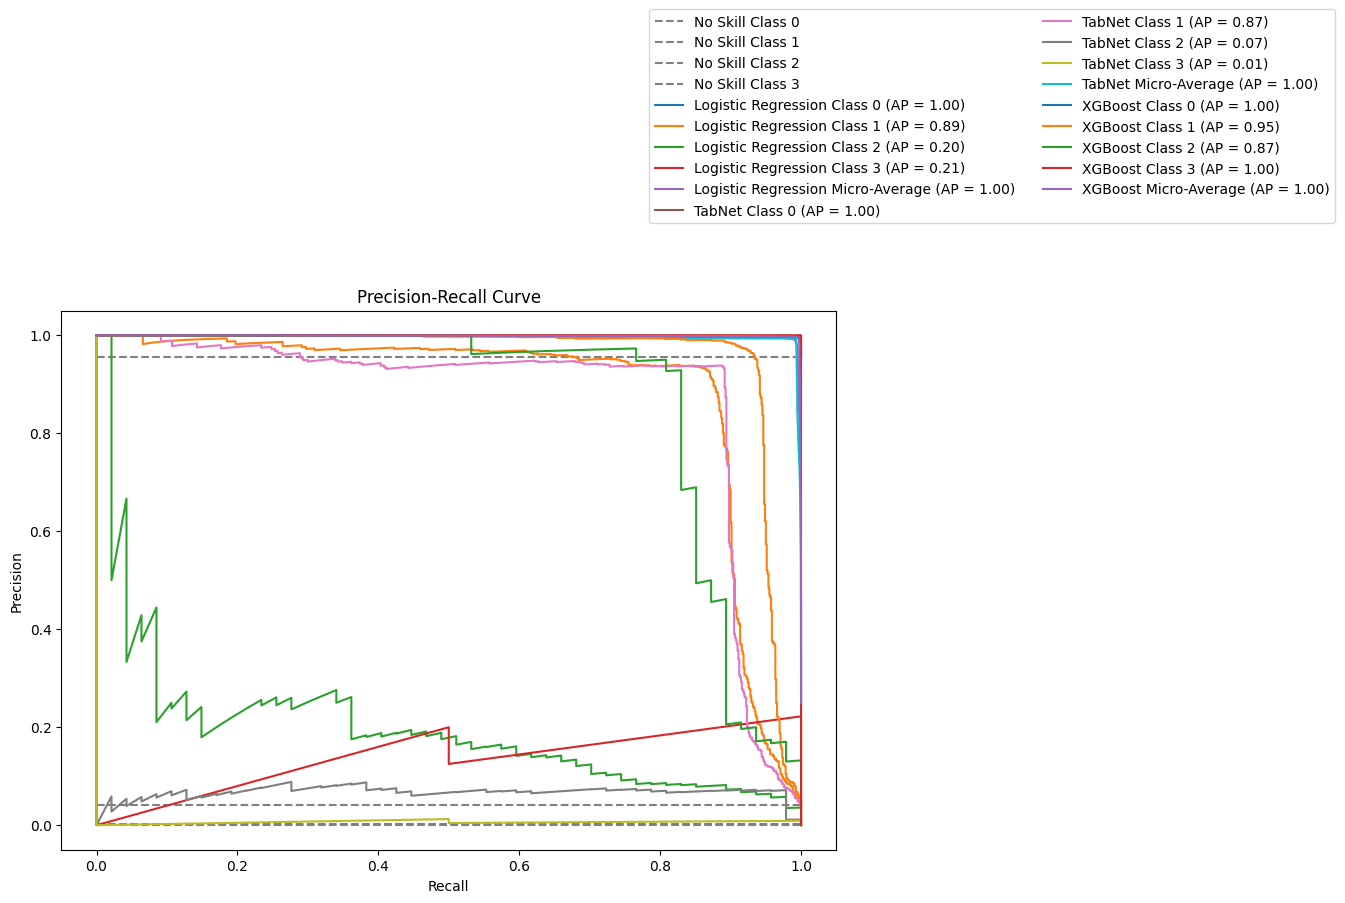

In [29]:
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt

def plot_precision_recall_curve(models, X_test, y_test, model_names):
    n_classes = len(np.unique(y_test))
    y_test = label_binarize(y_test, classes=np.unique(y_test))

    plt.figure(figsize=(10, 7))

    # No skill line
    no_skill = np.mean(y_test, axis=0)
    for i in range(n_classes):
        plt.plot([0, 1], [no_skill[i], no_skill[i]], color='gray', linestyle='--', label=f'No Skill Class {i}')

    for model, model_name in zip(models, model_names):
        try:
            y_pred_proba = model.predict_proba(X_test)
            precision = dict()
            recall = dict()
            average_precision = dict()
            for i in range(n_classes):
                precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_pred_proba[:, i])
                average_precision[i] = average_precision_score(y_test[:, i], y_pred_proba[:, i])
                plt.plot(recall[i], precision[i], label=f'{model_name} Class {i} (AP = {average_precision[i]:.2f})')

            # Averaging precision-recall curves
            precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(), y_pred_proba.ravel())
            average_precision["micro"] = average_precision_score(y_test, y_pred_proba, average="micro")
            plt.plot(recall["micro"], precision["micro"], label=f'{model_name} Micro-Average (AP = {average_precision["micro"]:.2f})')
        except AttributeError:
            print(f"{model_name} does not support predict_proba, skipping precision-recall curve.")
        except ValueError as e:
            print(f"{model_name} encountered an error with precision-recall curve calculation: {e}")

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(bbox_to_anchor=(0.75, 1.15), ncol=2)
    plt.show()

# Example usage:
models = [lr_model, tabnet_model, xgb_model]
model_names = ["Logistic Regression", "TabNet", "XGBoost"]
plot_precision_recall_curve(models, X_test_preprocessed, y_test, model_names)


### Line-by-Line Explanation:

1. **Imports**:
   ```python
   from sklearn.metrics import precision_recall_curve, average_precision_score
   from sklearn.preprocessing import label_binarize
   import numpy as np
   import matplotlib.pyplot as plt
   ```
   - Import necessary functions from `sklearn.metrics` and `sklearn.preprocessing`.
   - Import `numpy` for numerical operations.
   - Import `matplotlib.pyplot` for plotting.

2. **Function Definition**:
   ```python
   def plot_precision_recall_curve(models, X_test, y_test, model_names):
   ```
   - Define the function `plot_precision_recall_curve` that takes a list of models, test data (`X_test`, `y_test`), and model names as inputs.

3. **Determine Number of Classes**:
   ```python
   n_classes = len(np.unique(y_test))
   ```
   - Determine the number of unique classes in `y_test`.

4. **Binarize Target Labels**:
   ```python
   y_test = label_binarize(y_test, classes=np.unique(y_test))
   ```
   - Convert the target labels `y_test` into a binary format suitable for multi-class precision-recall curve calculation.

5. **Create Plot Figure**:
   ```python
   plt.figure(figsize=(10, 7))
   ```
   - Create a plot figure with a specified size of 10x7 inches.

6. **Plot No Skill Line**:
   ```python
   no_skill = np.mean(y_test, axis=0)
   for i in range(n_classes):
       plt.plot([0, 1], [no_skill[i], no_skill[i]], color='gray', linestyle='--', label=f'No Skill Class {i}')
   ```
   - Calculate the no-skill line as the mean of the binary target labels for each class.
   - Plot the no-skill line for each class.

7. **Loop Through Models**:
   ```python
   for model, model_name in zip(models, model_names):
   ```
   - Loop through each model and corresponding model name.

8. **Try Block for Precision-Recall Curve Calculation**:
   ```python
   try:
       y_pred_proba = model.predict_proba(X_test)
       precision = dict()
       recall = dict()
       average_precision = dict()
       for i in range(n_classes):
           precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_pred_proba[:, i])
           average_precision[i] = average_precision_score(y_test[:, i], y_pred_proba[:, i])
           plt.plot(recall[i], precision[i], label=f'{model_name} Class {i} (AP = {average_precision[i]:.2f})')
   ```
   - Try to get the predicted probabilities for each class using `model.predict_proba(X_test)`.
   - Initialize dictionaries to store precision, recall, and average precision for each class.
   - Calculate precision-recall curves and average precision scores for each class and plot them.

9. **Micro-Average Precision-Recall Curve**:
   ```python
       precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(), y_pred_proba.ravel())
       average_precision["micro"] = average_precision_score(y_test, y_pred_proba, average="micro")
       plt.plot(recall["micro"], precision["micro"], label=f'{model_name} Micro-Average (AP = {average_precision["micro"]:.2f})')
   ```
   - Calculate the micro-average precision-recall curve and average precision score by aggregating all classes.
   - Plot the micro-average precision-recall curve.

10. **Exception Handling**:
    ```python
   except AttributeError:
       print(f"{model_name} does not support predict_proba, skipping precision-recall curve.")
   except ValueError as e:
       print(f"{model_name} encountered an error with precision-recall curve calculation: {e}")
    ```
    - Handle exceptions if the model does not support `predict_proba` or if there is an error in the precision-recall curve calculation.

11. **Plot Labels and Title**:
    ```python
   plt.xlabel('Recall')
   plt.ylabel('Precision')
   plt.title('Precision-Recall Curve')
   plt.legend(loc="lower left")
   plt.show()
    ```
    - Set the labels for the x-axis and y-axis.
    - Set the title of the plot.
    - Add a legend to the plot.
    - Display the plot.

This function plots the precision-recall curves for each class and the micro-average curve for each model, along with a no-skill line for comparison. The curves are plotted in one chart for easy comparison.

In the context of the precision-recall curve, "AP" stands for "Average Precision." Average Precision is a single-value metric that summarizes the precision-recall curve by calculating the average of the precision values obtained for each threshold.

### Definition and Calculation:
- **Precision**: The ratio of true positive predictions to the total number of positive predictions (true positives + false positives).
- **Recall**: The ratio of true positive predictions to the total number of actual positives (true positives + false negatives).

The precision-recall curve plots precision against recall for different probability thresholds. The Average Precision (AP) is calculated as the area under this curve. It provides a measure of the model's performance across all thresholds, with higher values indicating better performance.

### Interpretation:
- **AP = 1**: Perfect precision and recall.
- **AP = 0**: Poor precision and recall.

In the context of your code, the `average_precision_score` function from `sklearn.metrics` is used to compute the AP for each class and the micro-average AP for all classes combined. The micro-average AP aggregates the contributions of all classes to compute a single AP value.

### Example in Code:
```python
average_precision[i] = average_precision_score(y_test[:, i], y_pred_proba[:, i])
plt.plot(recall[i], precision[i], label=f'{model_name} Class {i} (AP = {average_precision[i]:.2f})')
```
- For each class `i`, the `average_precision_score` function computes the AP based on the true labels `y_test[:, i]` and the predicted probabilities `y_pred_proba[:, i]`.
- The AP value is then included in the label for the precision-recall curve plot.

In summary, AP is a useful metric for evaluating the performance of classification models, especially in imbalanced datasets where the focus is on the positive class. It provides a concise summary of the model's ability to correctly identify positive instances across different probability thresholds.

 showcasing the performance of multiple models (Logistic Regression, TabNet, XGBoost) across various classes.

Here are a few observations:

1. **Class-specific AP (Average Precision)**:
    - Logistic Regression shows high AP for Class 0 and Class 1 but significantly lower for Class 2 and Class 3.
    - XGBoost shows high AP for Class 0, Class 1, and Class 3 but lower for Class 2.
    - TabNet shows a perfect AP for Class 0 and lower values for the other classes.

2. **Micro-Average AP**:
    - Logistic Regression, XGBoost, and TabNet all have a perfect (1.00) micro-average AP, indicating strong overall performance when all classes are considered together.

3. **PR Curves**:
    - The PR curve for Logistic Regression Class 0 is very close to the top-right corner, indicating high precision and recall.
    - The PR curve for Logistic Regression Class 2 and Class 3 shows lower performance with considerable drops.
    - XGBoost PR curves for Class 0 and Class 1 are also near the top-right, indicating strong performance.
    - TabNet shows similar behavior for Class 0 but significantly poorer for Class 2 and Class 3.

The graph indicates that while certain models perform exceptionally well for specific classes, they might struggle with others. This could be due to class imbalance or the inherent difficulty in distinguishing those classes.

To ensure correctness:
- Verify that the labels and predictions fed into the calculation of precision-recall metrics are accurate.
- Confirm that the AP values and PR curves align with what you would expect from the model performance on your dataset.

If everything aligns, then this output should be considered correct. If there are discrepancies, you may need to revisit the data preprocessing or the metric calculation steps.